Имеется AI по типу ChatGPT. Выпустили обновление, которое должно улучшить выдачу ответов и снизить кол-во нажатий на 'generate answer again'. Необходимо узнать, действительно ли оно лучше.

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from tqdm import tqdm
%matplotlib inline

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [45]:
size = 10000000 # Кол-во юзеров данного сервиси
user_id = np.random.choice(size, size, replace=False) # Сгенерирую id пользователей
current_mean = 0.25 # Задам текущее среднее значение
shape = 2 # Форму распределение
scale = current_mean / shape # Scale, чтобы среднее было равно current_mean

gen_again = np.random.gamma(shape, scale=scale, size=size)
data = pd.DataFrame({'user_id': user_id,
                     'gen_again': gen_again})
data.head()

,user_id,gen_again
0,1861434,0.339212
1,6436713,0.241840
2,9723049,0.120659
3,7603956,0.461078
4,4697559,0.267639


In [46]:
data.gen_again.mean()

0.24991625281187477

count    1.000000e+07
mean     2.499163e-01
std      1.766996e-01
min      7.686034e-05
25%      1.201136e-01
50%      2.097421e-01
75%      3.364387e-01
max      2.337043e+00
Name: gen_again, dtype: float64


<AxesSubplot:xlabel='gen_again', ylabel='Count'>

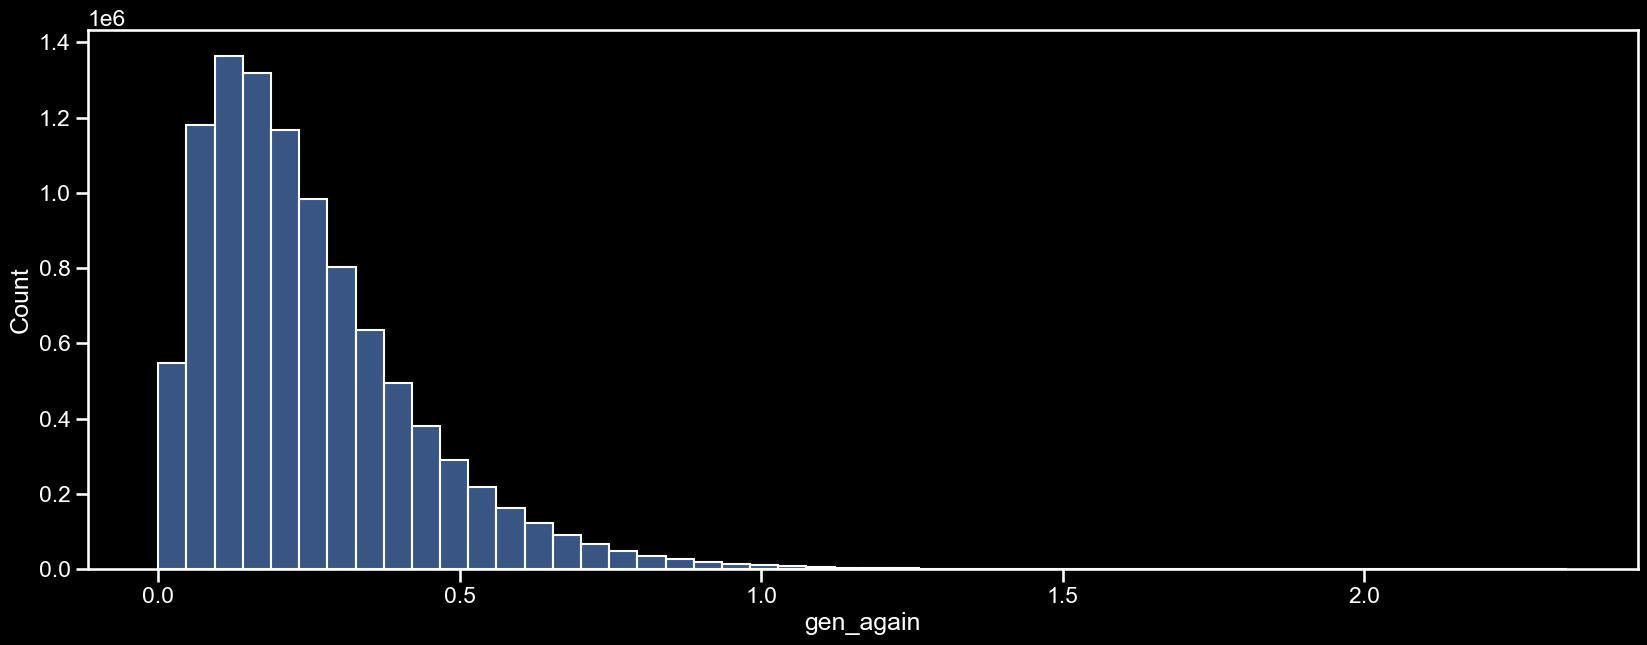

In [47]:
print(data.gen_again.describe())
plt.figure(figsize=(20,7))
sns.histplot(data=data.gen_again, bins=50)

In [48]:
#Рассчитаю размер выборки
effect_size = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(effect_size, power=0.9, alpha=0.01, ratio=1)) * 2

In [49]:
# Сплит система. АА тест.
def split(uid):
    group = hash(str(uid) + 'hello') % 2
    return 'test' if group else 'control'
data['group'] = data.user_id.apply(split)


a = data.query('group == "control"').gen_again
b = data.query('group == "test"').gen_again
stats.ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=0.9743958286923451, pvalue=0.32986006339315066)